In [7]:
import berserk
import pandas as pd
import numpy as np

session = berserk.TokenSession('RSdfMXw0HaoY4RXF')
client = berserk.Client(session=session)

from pgn_parser import pgn, parser
import sys
import chess.pgn
import lichess.api
import matplotlib.pyplot as plt
from datetime import *
import time

In [8]:
username = "wtlcpicclgii"
no_of_games = 200
td = 5.5

In [39]:
def get_li_rated(username, no_of_games, td):
    import time
    games = lichess.api.user_games(username)
    li = []
    try:
        for i in range(no_of_games):
            li.append(next(games))
    except:
        pass
    li_rated = []
    for i in range(len(li)):
        if li[i]["rated"] == True and li[i]["variant"] == "standard":
            li_rated.append(li[i])
            
            
    tmstmp_list = []
    for i in range(len(li_rated)):
        
        tmstmp_list.append(li_rated[i]["createdAt"]/1000)
        
    clr_list = []
    for i in range(len(li_rated)):
        if li_rated[i]["players"]["white"]["user"]["id"] == username:
            clr_list.append("white")
        else:
            clr_list.append("black")
        
    res_list = []
    for i in range(len(li_rated)):
        try:
            if li_rated[i]["status"] == "mate" or li_rated[i]["status"] == "resign" or li_rated[i]["status"] == "outoftime" or li_rated[i]["status"] == "timeout":
                if clr_list[i] == li_rated[i]["winner"]:
                    res_list.append(1)
                else:
                    res_list.append(0)
            else:
                res_list.append(0.5)
        except:
            res_list.append(0.5)
        
                
    a_dict = {"Timestamp": tmstmp_list, "Result": res_list}
    
    df = pd.DataFrame(a_dict)
    
    li_datetime = []

    for i in range(len(df)):
        li_datetime.append(time.ctime(df["Timestamp"][i]))
        
    df["Date"] = li_datetime
    
    df["Date"] = pd.to_datetime(df["Date"])
    
    df["Hour"] = df["Date"].dt.hour
    
    df["Minute"] = df["Date"].dt.minute
    
    h1_li = []
    h_li = df["Hour"].tolist()
    m_li = df["Minute"].tolist()
    for i in range(len(df)):
        if m_li[i] >29:
            h1_li.append(h_li[i] + 0.5)
        else:
            h1_li.append(h_li[i])
            
    lt = []
    for time in h1_li:
        x = time -5.5 + td
        if x >= 24:
            x = x - 24
        elif x < 0:
            x = x + 24
        lt.append(x)
        
    l2 = []
    for i in lt:
        if i%1 != 0:
            l2.append(i-0.5)
        else:
            l2.append(i)
    
    df["Local_H"] = l2
    
    fig, ax1 = plt.subplots()

    ax2 = ax1.twinx()
    hours = [hour for hour, df in df.groupby("Local_H")]

    ax1.bar(hours, df.groupby(["Local_H"]).count()["Result"])
    ax2.plot(hours, df.groupby(["Local_H"]).mean()["Result"], 'r-', linewidth = 4)
    ax1.set_xlabel("Hour", fontsize = 15)
    ax1.set_ylabel("No. of Games played", fontsize = 15)
    ax2.set_ylabel("Average performance", fontsize = 15)
    plt.tick_params(labelsize=12, pad=10)
    plt.xticks(hours)
   
    plt.gcf().set_size_inches(20, 10)
    plt.grid()
    plt.show()
        


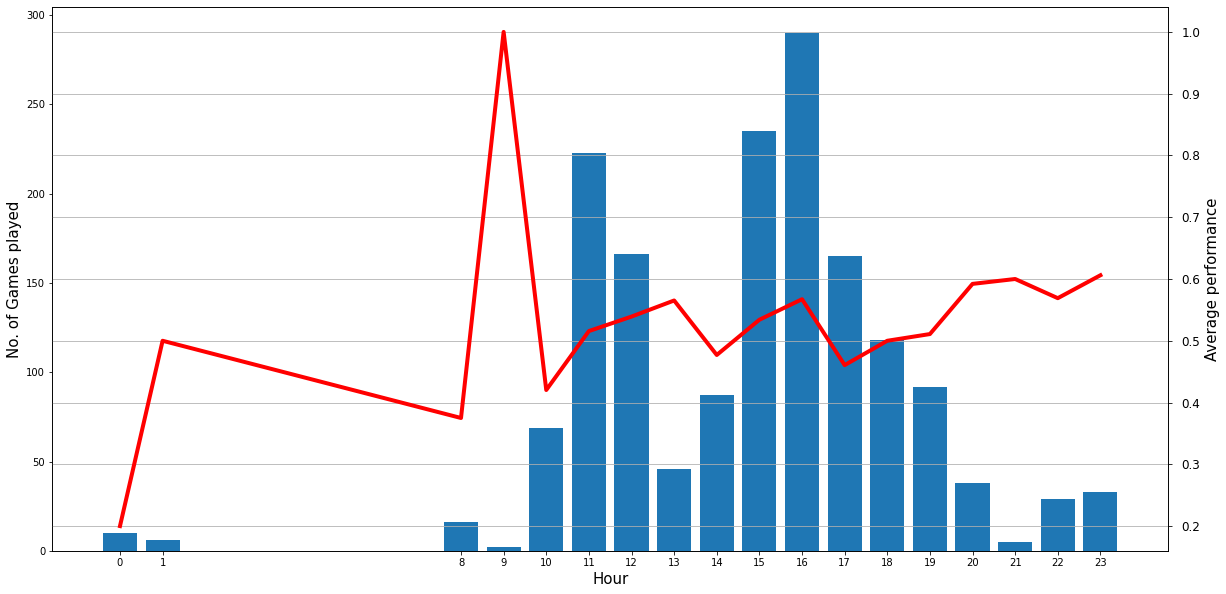

In [40]:
get_li_rated(username, 2000, td)